In [3]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'blotta' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [4]:
#importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import csv
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=blotta:US:bquxjob_7d29d88c_18988cd879d)
back to BigQuery to edit the query within the BigQuery user interface.

In [5]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_562e7c5e_189937c3bcf') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT sexo, id_municipio, ano, tempo_emprego, quantidade_horas_contratadas, valor_remuneracao_media_sm, cbo_2002, idade, tipo_vinculo FROM `basedosdados.br_me_rais.microdados_vinculos` WHERE cbo_2002 LIKE "2611%%" OR cbo_1994 ="15210" OR cbo_1994 = "15220" OR cbo_1994 = "15230" OR cbo_1994 = "15240" OR cbo_1994 = "15245" OR cbo_1994 = "15250"


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [6]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_562e7c5e_189937c3bcf') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,sexo,id_municipio,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo
0,1,1200401,1985,1.8,<NA>,3.12,None,<NA>,1
1,1,1200401,1985,0.5,<NA>,26.16,None,<NA>,1
2,1,1200401,1985,6.2,<NA>,9.37,None,<NA>,1
3,2,1200401,1985,1.0,<NA>,4.97,None,<NA>,1
4,1,1200401,1985,0.3,<NA>,3.07,None,<NA>,1
...,...,...,...,...,...,...,...,...,...
1315048,2,3554102,2020,0.9,36,2.91,261125,36,10
1315049,2,3554102,2020,20.9,30,2.85,261135,30,10
1315050,2,3556206,2020,61.9,40,5.46,261125,54,30
1315051,2,3556206,2020,98.8,44,3.46,261135,32,10


In [7]:
#Limpeza geral

results = results.drop(columns=['tempo_emprego'], axis = 0)
results['Salario/hora'] = results.valor_remuneracao_media_sm/results.quantidade_horas_contratadas
results.sexo = results.sexo.astype(int)
display(results)

,sexo,id_municipio,ano,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo,Salario/hora
0,1,1200401,1985,<NA>,3.12,None,<NA>,1,<NA>
1,1,1200401,1985,<NA>,26.16,None,<NA>,1,<NA>
2,1,1200401,1985,<NA>,9.37,None,<NA>,1,<NA>
3,2,1200401,1985,<NA>,4.97,None,<NA>,1,<NA>
4,1,1200401,1985,<NA>,3.07,None,<NA>,1,<NA>
...,...,...,...,...,...,...,...,...,...
1315048,2,3554102,2020,36,2.91,261125,36,10,0.080833
1315049,2,3554102,2020,30,2.85,261135,30,10,0.095
1315050,2,3556206,2020,40,5.46,261125,54,30,0.1365
1315051,2,3556206,2020,44,3.46,261135,32,10,0.078636


## Plotagem dos boxplots

In [8]:
#Limpeza 1

idadeusar = results.dropna(subset=['idade'])
horasusar = results.dropna(subset=['quantidade_horas_contratadas'])

<Axes: >

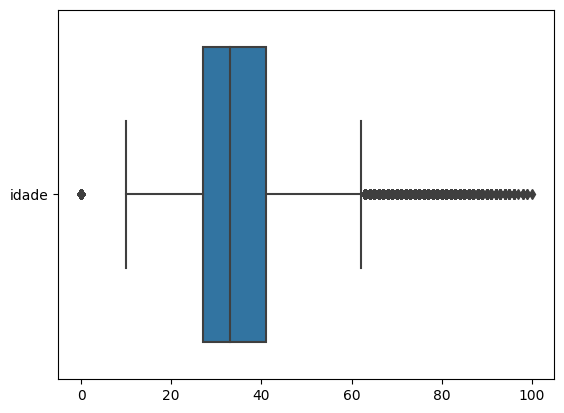

In [9]:
boxplot = idadeusar.drop(columns=['sexo', 'ano', 'cbo_2002', 'valor_remuneracao_media_sm', 'quantidade_horas_contratadas', 'Salario/hora', 'tipo_vinculo'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

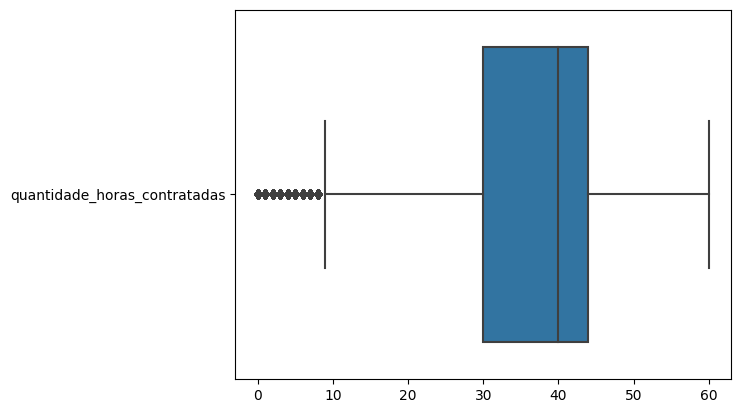

In [10]:
boxplot = horasusar.drop(columns=['sexo', 'ano', 'cbo_2002', 'valor_remuneracao_media_sm', 'idade', 'Salario/hora', 'tipo_vinculo'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

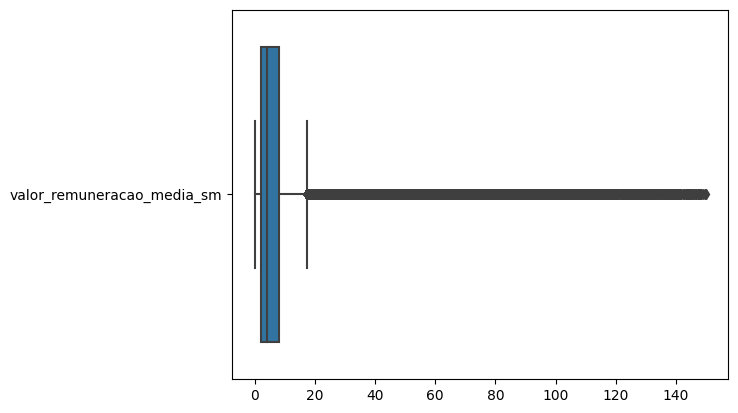

In [11]:
boxplot = results.drop(columns=['sexo', 'Salario/hora', 'tipo_vinculo', 'ano', 'cbo_2002', 'idade', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

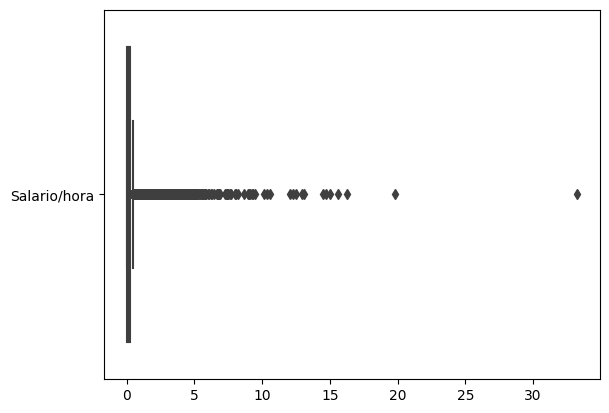

In [12]:
boxplot = horasusar.drop(columns=['sexo', 'valor_remuneracao_media_sm', 'tipo_vinculo', 'ano', 'cbo_2002', 'idade', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

## Remoção de Outliers

A opção foi por remover apenas outliers considerados quase impossíveis no mercado, como é o caso apenas da contratação por 0 horas e de idades maiores do que 90 anos ou inferiores a 10 anos.

In [13]:
idadeusar.loc[idadeusar.idade < 10] = np.nan
idadeusar.loc[idadeusar.idade > 90] = np.nan
horasusar.loc[horasusar.quantidade_horas_contratadas < 1] = np.nan

In [14]:
idadeusar = idadeusar.dropna(subset='idade')
horasusar = horasusar.dropna(subset='quantidade_horas_contratadas')

## Análises

<ipython-input-15-6637a8e5a363>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = results.corr()


<Axes: >

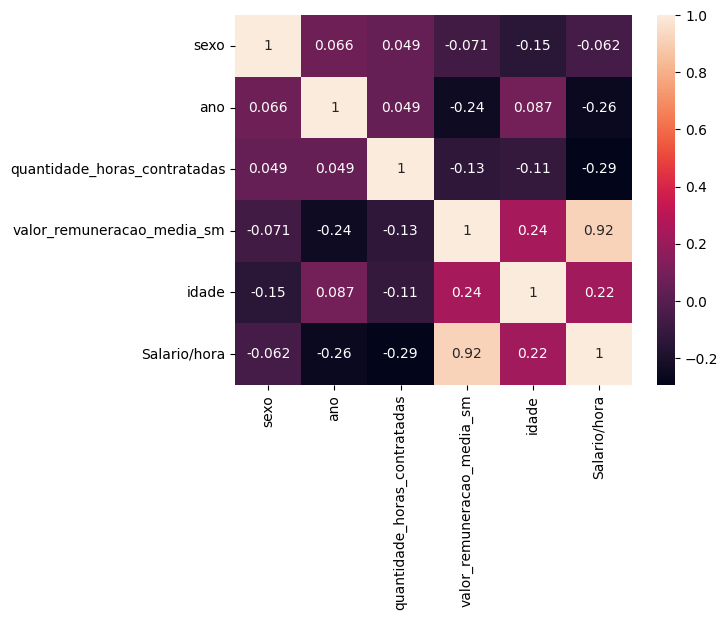

In [15]:
corr_matrix = results.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-16-eff8b5b4f8c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = horasusar.corr()


<Axes: >

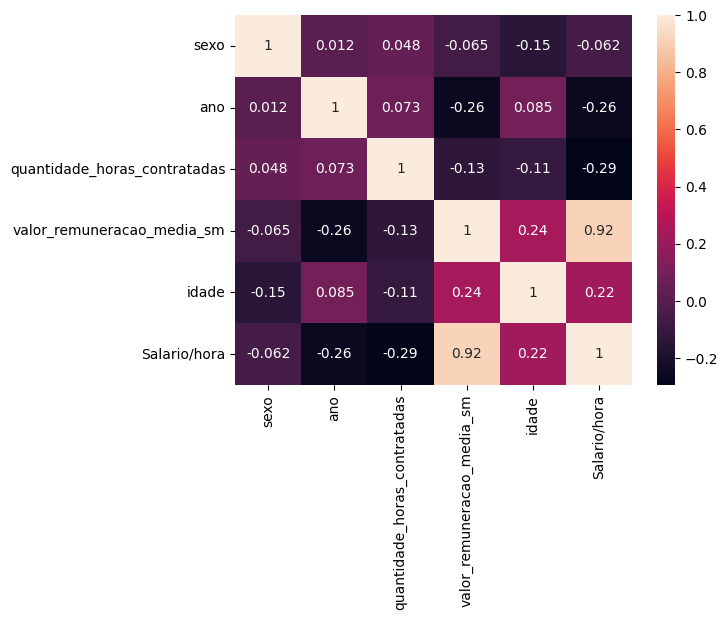

In [16]:
corr_matrix = horasusar.corr()
sns.heatmap(corr_matrix, annot = True)

<ipython-input-17-869ba13ccab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = idadeusar.corr()


<Axes: >

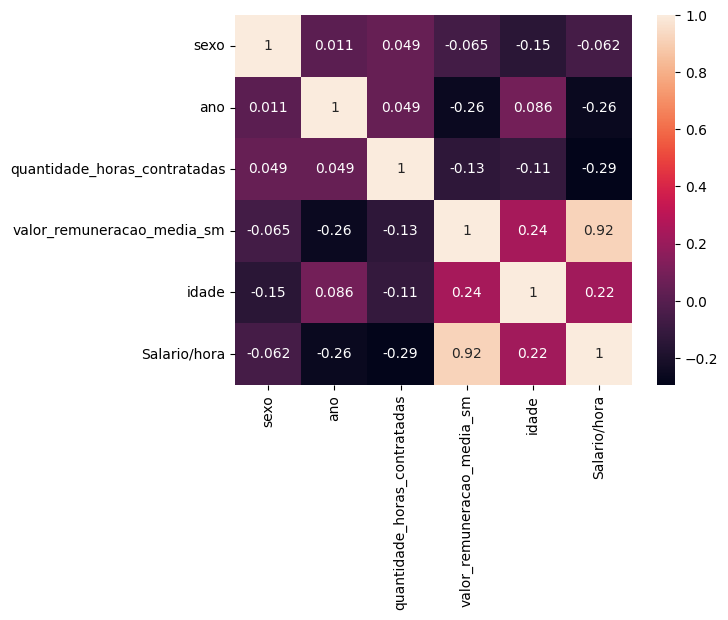

In [17]:
corr_matrix = idadeusar.corr()
sns.heatmap(corr_matrix, annot = True)

In [18]:
#Construção da tabela com resultados

mulheres = results.loc[(results['sexo'] == 2)]
homens = results.loc[(results['sexo'] == 1)]

analise = pd.DataFrame(columns = ['ano'])
anos = []
for i in range(1985, 2022):
  anos.append(i)
analise['ano'] = anos
display(analise)

,ano
0,1985
1,1986
2,1987
3,1988
4,1989
5,1990
6,1991
7,1992
8,1993
9,1994


In [19]:
#Proporção

total_mulheres = mulheres.groupby('ano')
total_mulheres = total_mulheres.ano.value_counts()
total_mulheres = np.asarray(total_mulheres)
analise['Total mulheres'] = total_mulheres

total = results.groupby('ano')
total = total.ano.value_counts()
total = np.asarray(total)
analise['Porcentagem de mulheres'] = total_mulheres/total

In [20]:
#Salário

media_mulheres = mulheres.groupby('ano')
media_mulheres = media_mulheres.valor_remuneracao_media_sm.mean()
media_mulheres = np.asarray(media_mulheres)
analise['Média Salarial'] = media_mulheres

media_homens = homens.groupby('ano')
media_homens = media_homens.valor_remuneracao_media_sm.mean()
media_homens = np.asarray(media_homens)
analise['Diferença Salarial'] = (media_mulheres - media_homens)/media_homens
analise['Média Homens'] = media_homens

salhora_mulheres = mulheres.groupby('ano')
salhora_mulheres = salhora_mulheres['Salario/hora'].mean()
salhora_mulheres = np.asarray(salhora_mulheres)
analise['Salário/hora'] = salhora_mulheres

salhora_homens = homens.groupby('ano')
salhora_homens = salhora_homens['Salario/hora'].mean()
salhora_homens = np.asarray(salhora_homens)
analise['Diferença Salário/hora'] = (salhora_mulheres - salhora_homens)/salhora_homens
analise['Salário/hora homens'] = salhora_homens


In [21]:
#Tipo de vínculo
job = client.get_job('bquxjob_33bae303_18993814a11') # Job ID inserted based on the query results selected to explore
results_vinc = job.to_dataframe()
print(job.query)

SELECT ano, sexo, tipo_vinculo FROM `blotta._d731c8db3b43ddb417ba10d6e72a9c633c4d7cfd.anon54b49c70350fe6698f77d24daff2f757bd5794eb3ba907e3d76cc3b85f0e09cf` WHERE tipo_vinculo='95' OR tipo_vinculo='90' OR tipo_vinculo='50' OR tipo_vinculo='40' OR tipo_vinculo='5' OR tipo_vinculo='4' OR tipo_vinculo='3'


In [22]:
mulheres_vinc = results_vinc.loc[(results['sexo'] == 2)]
homens_vinc = results_vinc.loc[(results['sexo'] == 1)]

vinc_mulheres = mulheres_vinc.groupby('ano')
vinc_mulheres = vinc_mulheres.ano.value_counts()
vinc_mulheres = np.asarray(vinc_mulheres)
analise['Vínculo precários mulheres'] = vinc_mulheres

total = results_vinc.groupby('ano')
total = total.ano.value_counts()
total = np.asarray(total)
analise['Porcentagem de vínculos precários mulheres'] = vinc_mulheres/total

In [23]:
#Horas contratadas

mulheres_horas = horasusar.loc[(results['sexo'] == 2)]
homens_horas = horasusar.loc[(results['sexo'] == 1)]

mulheres_horas = mulheres_horas.groupby('ano')
mulheres_horas = mulheres_horas['quantidade_horas_contratadas'].mean()
mulheres_horas = np.asarray(mulheres_horas)
mulheres_horas = list(mulheres_horas)
for i in range (1985, 1994):
  mulheres_horas.insert(0, 0)
analise['Horas trabalhadas (mulheres)'] = mulheres_horas

homens_horas = homens_horas.groupby('ano')
homens_horas = homens_horas['quantidade_horas_contratadas'].mean()
homens_horas = np.asarray(homens_horas)
homens_horas = list(homens_horas)
for i in range (1985, 1994):
  homens_horas.insert(0, 0)
homens_horas = np.asarray(homens_horas)
mulheres_horas = np.asarray(mulheres_horas)
analise['Diferença horas contratadas'] = (mulheres_horas - homens_horas)/homens_horas
analise['Horas trabalhadas homens'] = homens_horas

<ipython-input-23-7b57862bd239>:22: RuntimeWarning: invalid value encountered in true_divide
  analise['Diferença horas contratadas'] = (mulheres_horas - homens_horas)/homens_horas


In [24]:
#Idade

idade_man = idadeusar.loc[idadeusar['sexo'] == 1]
idade_wom = idadeusar.loc[idadeusar['sexo'] == 2]

idade_wom = idade_wom.groupby('ano')
idade_wom = idade_wom ['idade'].mean()
idade_wom = np.asarray(idade_wom)
idade_wom = list(idade_wom)
for i in range(1985, 1994):
  idade_wom.insert(0, 0)
analise['Idade média (mulheres)'] = idade_wom

idade_man = idade_man.groupby('ano')
idade_man = idade_man['idade'].mean()
idade_man = np.asarray(idade_man)
idade_man = list(idade_man)
for i in range (1985, 1994):
  idade_man.insert(0, 0)
idade_wom = np.asarray(idade_wom)
idade_man = np.asarray(idade_man)
analise['Diferença idade'] = (idade_wom - idade_man)/idade_man
analise['Idade média (homens)'] = idade_man

<ipython-input-24-4d99b5e4ddbd>:22: RuntimeWarning: invalid value encountered in true_divide
  analise['Diferença idade'] = (idade_wom - idade_man)/idade_man


## Análises de indicadores estatísticos

In [25]:
salario = []
for i in range(1985, 2022):
  df_man = homens.loc[homens['ano'] == i]
  df_wom = mulheres.loc[mulheres['ano'] == i]
  stat, p_t = ttest_ind(df_man.valor_remuneracao_media_sm, df_wom.valor_remuneracao_media_sm)
  stat, pvalor_n = stats.normaltest(df_man.valor_remuneracao_media_sm)
  print(pvalor_n)
  stat, pvalor_n = stats.normaltest(df_wom.valor_remuneracao_media_sm)
  print(pvalor_n)
  salario.append(p_t)

horas = []
for i in range(1994, 2022):
  df_man = homens.loc[homens['ano'] == i]
  df_wom = mulheres.loc[mulheres['ano'] == i]
  stat, p_t = ttest_ind(df_man.quantidade_horas_contratadas.astype(float), df_wom.quantidade_horas_contratadas.astype(float))
  stat, pvalor_n = stats.normaltest(df_man.quantidade_horas_contratadas.astype(float))
  print(pvalor_n)
  stat, pvalor_n = stats.normaltest(df_wom.quantidade_horas_contratadas.astype(float))
  print(pvalor_n)
  horas.append(p_t)

salario_hora = []
for i in range(1994, 2022):
  df_man = homens.loc[homens['ano'] == i]
  df_wom = mulheres.loc[mulheres['ano'] == i]
  stat, p_t = ttest_ind(df_man['Salario/hora'].astype(float), df_wom['Salario/hora'].astype(float))
  stat, pvalor_n = stats.normaltest(df_man['Salario/hora'].astype(float))
  print(pvalor_n)
  stat, pvalor_n = stats.normaltest(df_wom['Salario/hora'].astype(float))
  print(pvalor_n)
  salario_hora.append(p_t)

idades= []
for i in range(1994, 2022):
  df_man = idadeusar.loc[(idadeusar['ano'] == i) & (idadeusar['sexo'] == 1)]
  df_wom = idadeusar.loc[(idadeusar['ano'] == i) & (idadeusar['sexo'] == 2)]
  stat, p_t = ttest_ind(df_man['idade'].astype(float), df_wom['idade'].astype(float))
  stat, pvalor_n = stats.normaltest(df_man['idade'].astype(float))
  print(pvalor_n)
  stat, pvalor_n = stats.normaltest(df_wom['idade'].astype(float))
  print(pvalor_n)
  idades.append(p_t)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0647420194765555e-37
1.057230189493222e-22
3.25545079374232e-29
6.19247376268188e-22
6.606868880141883e-14
3.861885096691208e-10
2.4721946667792577e-13
3.1592628818752065e-05
2.7906913002161228e-12
1.3743385936139558e-06
0.012207526771410019
8.259531713843852e-09
0.07607646053635381
2.276651456700707e-18
5.374900515224494e-06
1.0244266350882597e-07
6.575643644962272e-08
3.636837372275321e-10
8.280442009215364e-239
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
nan
nan
nan
nan
nan
0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6337: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6337: RuntimeWarning: invalid valu

nan
nan
nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
nan
nan
nan
nan
nan
nan
1.5797413532385058e-177
1.602089520979499e-232
1.400636962693819e-177
3.001868939759851e-236
5.614729934384224e-200
5.326580334246051e-263
7.747998085742107e-200
9.255529689360835e-279
2.092472973803524e-216
8.989967837359353e-299
5.0572776741069313e-194
8.878085069174446e-271
3.9800886512005013e-240
0.0
2.1535481360517965e-203
0.0
1.3462014228066016e-196
0.0
1.6400175533236693e-276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [26]:
analise['t - Salário'] = salario
for i in range (1985, 1994):
  horas.insert(0, 'NA')
analise['t - Horas'] = horas
for i in range (1985, 1994):
  salario_hora.insert(0, 'NA')
analise['t - Salário/hora'] = salario_hora
for i in range(1985, 1994):
  idades.insert(0, 'NA')
analise['t - idade'] = idades

In [27]:
display(analise)

,ano,Total mulheres,Porcentagem de mulheres,Média Salarial,Diferença Salarial,Média Homens,Salário/hora,Diferença Salário/hora,Salário/hora homens,Vínculo precários mulheres,...,Horas trabalhadas (mulheres),Diferença horas contratadas,Horas trabalhadas homens,Idade média (mulheres),Diferença idade,Idade média (homens),t - Salário,t - Horas,t - Salário/hora,t - idade
0,1985,3639,0.339491,7.858453,-0.172319,9.494545,<NA>,<NA>,<NA>,44,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,6.056180e-24,NA,NA,NA
1,1986,4739,0.373886,7.736067,-0.163459,9.247685,<NA>,<NA>,<NA>,75,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.389707e-26,NA,NA,NA
2,1987,5092,0.378784,8.610071,-0.134562,9.948801,<NA>,<NA>,<NA>,47,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.514323e-18,NA,NA,NA
3,1988,5428,0.394419,8.708136,-0.131371,10.025146,<NA>,<NA>,<NA>,81,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,6.261977e-17,NA,NA,NA
4,1989,5790,0.371344,8.628822,0.000176,8.627301,<NA>,<NA>,<NA>,75,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,9.922625e-01,NA,NA,NA
5,1990,5994,0.383518,10.213428,-0.060647,10.872833,<NA>,<NA>,<NA>,62,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.808336e-04,NA,NA,NA
6,1991,6496,0.423938,10.318402,-0.107487,11.561073,<NA>,<NA>,<NA>,105,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,3.441165e-11,NA,NA,NA
7,1992,5995,0.415022,10.327158,-0.063219,11.024088,<NA>,<NA>,<NA>,151,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,9.598920e-05,NA,NA,NA
8,1993,6210,0.428187,9.675457,-0.042380,10.103645,<NA>,<NA>,<NA>,214,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.013466e-02,NA,NA,NA
9,1994,6743,0.439140,11.197976,-0.052382,11.816976,<NA>,<NA>,<NA>,90,...,33.542187,-0.004061,33.678953,31.989767,-0.138958,37.152382,9.675774e-04,0.20182,NaN,0.0


In [65]:
analise.to_csv('analises_mulheres.csv')

## Análises municipalizadas

In [28]:
municipios = pd.read_excel(r"/content/anexo_16261_Coordenadas_Sedes_5565_Municípios_2010 (1).xls")
municipios['id_municipio'] = municipios['GEOCODIGO_MUNICIPIO'].astype(str)
analise2 = municipios.merge(results, how='inner', left_on='id_municipio', right_on='id_municipio')

In [29]:
homens2 = analise2.loc[analise2['sexo'] == 1]
mulheres2 = analise2.loc[analise2['sexo'] == 2]

#Salário
salario_mun = pd.DataFrame(columns = ['id_municipio'])
for i  in range(1985, 2022):
  df_man = homens2.loc[homens2['ano'] == i]
  df_wom = mulheres2.loc[mulheres2['ano'] == i]
  df_man = df_man.groupby('id_municipio')
  df_wom = df_wom.groupby('id_municipio')
  media_homens = df_man['valor_remuneracao_media_sm'].mean()
  media_mulheres = df_wom['valor_remuneracao_media_sm'].mean()
  m = (media_mulheres - media_homens)/media_homens
  m = pd.DataFrame(m)
  m['ano'] = f'{i}'
  salario_mun = salario_mun.append(m)

#Quantidades
proporção_mun = pd.DataFrame(columns = ['id_municipio'])
for i  in range(1985, 2022):
  df_man = homens2.loc[homens2['ano'] == i]
  df_wom = mulheres2.loc[mulheres2['ano'] == i]
  df_man = df_man.groupby('id_municipio')
  df_wom = df_wom.groupby('id_municipio')
  homens = df_man['valor_remuneracao_media_sm'].count()
  mulheres = df_wom['valor_remuneracao_media_sm'].count()
  m = mulheres/(homens + mulheres)
  m = pd.DataFrame(m)
  m['ano'] = f'{i}'
  proporção_mun = proporção_mun.append(m)

#Horas
horas_mun = pd.DataFrame(columns = ['id_municipio'])
for i  in range(1994, 2022):
  df_man = homens2.loc[homens2['ano'] == i]
  df_wom = mulheres2.loc[mulheres2['ano'] == i]
  df_man = df_man.groupby('id_municipio')
  df_wom = df_wom.groupby('id_municipio')
  horas_homens = df_man['quantidade_horas_contratadas'].mean()
  horas_mulheres = df_wom['quantidade_horas_contratadas'].mean()
  m = (horas_mulheres - horas_homens)/horas_homens
  m = pd.DataFrame(m)
  m['ano'] = f'{i}'
  horas_mun = horas_mun.append(m)

<ipython-input-29-3a8f08026c06>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salario_mun = salario_mun.append(m)
<ipython-input-29-3a8f08026c06>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salario_mun = salario_mun.append(m)
<ipython-input-29-3a8f08026c06>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salario_mun = salario_mun.append(m)
<ipython-input-29-3a8f08026c06>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salario_mun = salario_mun.append(m)
<ipython-input-29-3a8f08026c06>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s

In [30]:
horas_mun['id_municipio'] = horas_mun.index
proporção_mun['id_municipio'] = proporção_mun.index
salario_mun['id_municipio'] = salario_mun.index

In [31]:
horas_mun = municipios.merge(horas_mun, how='inner', left_on='id_municipio', right_on='id_municipio')
proporção_mun = municipios.merge(proporção_mun, how='inner', left_on='id_municipio', right_on='id_municipio')
salario_mun = municipios.merge(salario_mun, how='inner', left_on='id_municipio', right_on='id_municipio')

In [32]:
horas_mun = horas_mun.dropna(subset = 'quantidade_horas_contratadas')
proporção_mun = proporção_mun.dropna(subset = 'valor_remuneracao_media_sm')
salario_mun = salario_mun.dropna(subset = 'valor_remuneracao_media_sm')
salario_mun = salario_mun.loc[salario_mun['valor_remuneracao_media_sm'] < 100]

In [34]:
horas_mun.to_csv('horas_mun.csv')
proporção_mun.to_csv('proporcao_mun.csv')
salario_mun.to_csv('salario_mun.csv')

## Análise por profissão

In [36]:
profissao = results.dropna(subset = 'cbo_2002')
homens3 = profissao.loc[profissao['sexo'] == 1]
mulheres3 = profissao.loc[profissao['sexo'] == 2]

In [46]:
#Proporção de mulheres
proporcao_prof = pd.DataFrame()
for i in profissao['cbo_2002'].unique():
  df_man = homens3.loc[homens3['cbo_2002'] == i]
  df_wom = mulheres3.loc[mulheres3['cbo_2002'] == i]
  df_man = df_man.groupby('ano')
  df_wom = df_wom.groupby('ano')
  total_homens = df_man['valor_remuneracao_media_sm'].count()
  total_mulheres = df_wom['valor_remuneracao_media_sm'].count()
  m = total_mulheres/(total_mulheres + total_homens)
  proporcao_prof[f'{i}'] = m

#Salário/hora
salario_prof = pd.DataFrame()
for i in profissao['cbo_2002'].unique():
  df_man = homens3.loc[homens3['cbo_2002'] == i]
  df_wom = mulheres3.loc[mulheres3['cbo_2002'] == i]
  df_man = df_man.groupby('ano')
  df_wom = df_wom.groupby('ano')
  media_homens = df_man['Salario/hora'].mean()
  media_mulheres = df_wom['Salario/hora'].mean()
  m = (media_mulheres - media_homens)/media_homens
  salario_prof[f'{i}'] = m

In [47]:
salario_prof.rename(columns={'261120': 'Editor', '261125': 'Colunista/correspondente', '261130': 'Redator', '261135': 'Repórter', '261140': 'Revisor', '261115': 'Redator-chefe', '261105': 'Arquivista', '261110': 'Assessor de Imprensa'}, inplace = True)
proporcao_prof.rename(columns={'261120': 'Editor', '261125': 'Colunista/correspondente', '261130': 'Redator', '261135': 'Repórter', '261140': 'Revisor', '261115': 'Redator-chefe', '261105': 'Arquivista', '261110': 'Assessor de Imprensa'}, inplace = True)

In [49]:
proporcao_prof.to_csv('proporcao_prof.csv')
salario_prof.to_csv('salario_prof.csv')